In [362]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Exploratory Analysis and pre-processing

In [363]:
df = pd.read_csv(r'D:\SEM 2\ML\Homework\sgemm_product_dataset\sgemm_product.csv')

In [364]:
df['avg_run'] = df[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)

In [365]:
df = df.drop(columns=['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'])

In [366]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,241600.0,80.415364,42.469220,16.0000,32.0000,64.00,128.0000,128.0000
NWG,241600.0,80.415364,42.469220,16.0000,32.0000,64.00,128.0000,128.0000
KWG,241600.0,25.513113,7.855619,16.0000,16.0000,32.00,32.0000,32.0000
MDIMC,241600.0,13.935894,7.873662,8.0000,8.0000,8.00,16.0000,32.0000
NDIMC,241600.0,13.935894,7.873662,8.0000,8.0000,8.00,16.0000,32.0000
MDIMA,241600.0,17.371126,9.389418,8.0000,8.0000,16.00,32.0000,32.0000
NDIMB,241600.0,17.371126,9.389418,8.0000,8.0000,16.00,32.0000,32.0000
KWI,241600.0,5.000000,3.000006,2.0000,2.0000,5.00,8.0000,8.0000
VWM,241600.0,2.448609,1.953759,1.0000,1.0000,2.00,4.0000,8.0000
VWN,241600.0,2.448609,1.953759,1.0000,1.0000,2.00,4.0000,8.0000


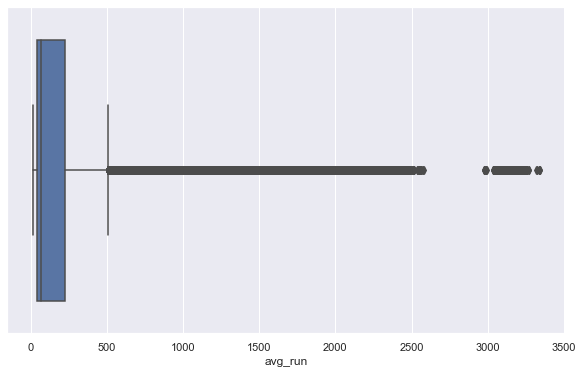

In [367]:
plt.figure(figsize=(10,6))
sns.boxplot(df['avg_run']);

In [368]:
#removing outliers by calculating right whisker
df.drop(df[df['avg_run']>600].index,inplace=True)

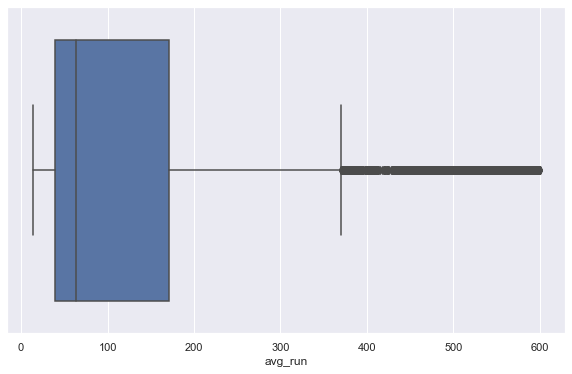

In [369]:
plt.figure(figsize=(10,6))
sns.boxplot(df['avg_run'])

In [370]:
# approx 19k rows were dropped
df.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,avg_run
count,220631.000000,220631.000000,220631.000000,220631.000000,220631.000000,220631.000000,220631.000000,220631.000000,220631.000000,220631.000000,220631.000000,220631.000000,220631.000000,220631.000000,220631.000000
mean,77.034614,76.940629,25.449334,14.360666,14.364328,17.387801,17.387983,4.991964,2.373497,2.370438,0.499921,0.499635,0.480372,0.479901,125.922680
std,42.237549,42.195222,7.867637,8.055872,8.054798,9.377896,9.378720,2.999996,1.888309,1.884902,0.500001,0.500001,0.499616,0.499597,131.995865
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.317500
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.410000
50%,64.000000,64.000000,32.000000,16.000000,16.000000,16.000000,16.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,63.870000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,171.608750
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,599.997500


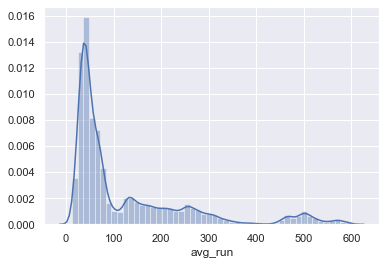

In [371]:
# Checking distribution
sns.distplot(df['avg_run'])

In [372]:
# taking log on target variable to improve distribution
df['avg_run'] = np.log(df.avg_run)

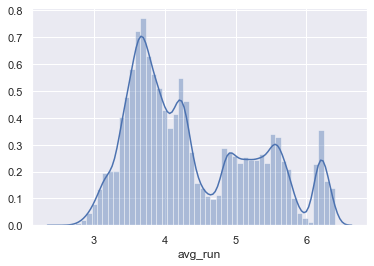

In [373]:
# Checking distribution
sns.distplot(df['avg_run'])

In [374]:
df.corr()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,avg_run
MWG,1.000000,-0.068217,0.000938,0.157552,0.035015,0.173317,0.018927,-0.003067,0.359503,-0.038285,-0.000191,-0.000881,-0.041795,-0.032378,0.403843
NWG,-0.068217,1.000000,0.002579,0.036255,0.160040,0.019002,0.173676,-0.000849,-0.038325,0.358404,0.000111,-0.000512,-0.032568,-0.042765,0.242647
KWG,0.000938,0.002579,1.000000,0.159417,0.159194,-0.038057,-0.037684,0.001733,-0.016714,-0.017083,0.000237,0.000757,0.005498,0.007776,-0.061408
MDIMC,0.157552,0.036255,0.159417,1.000000,-0.248492,0.209936,0.089008,0.001989,-0.124957,0.036339,0.000107,0.000558,0.022280,0.023170,-0.183756
NDIMC,0.035015,0.160040,0.159194,-0.248492,1.000000,0.089149,0.210081,0.001536,0.034812,-0.124325,0.000130,0.000140,0.022846,0.023340,-0.170947
MDIMA,0.173317,0.019002,-0.038057,0.209936,0.089149,1.000000,0.096802,0.000296,-0.197646,-0.020764,-0.000038,-0.000124,0.000513,0.001202,-0.027026
NDIMB,0.018927,0.173676,-0.037684,0.089008,0.210081,0.096802,1.000000,0.000354,-0.020829,-0.197688,-0.000073,-0.000167,0.001322,0.000177,-0.041973
KWI,-0.003067,-0.000849,0.001733,0.001989,0.001536,0.000296,0.000354,1.000000,-0.002862,-0.001479,0.000267,0.000837,-0.001135,-0.000194,-0.038087
VWM,0.359503,-0.038325,-0.016714,-0.124957,0.034812,-0.197646,-0.020829,-0.002862,1.000000,-0.017052,0.000360,0.000430,-0.020005,-0.017657,0.184739
VWN,-0.038285,0.358404,-0.017083,0.036339,-0.124325,-0.020764,-0.197688,-0.001479,-0.017052,1.000000,0.000310,0.000485,-0.017889,-0.019442,0.090127


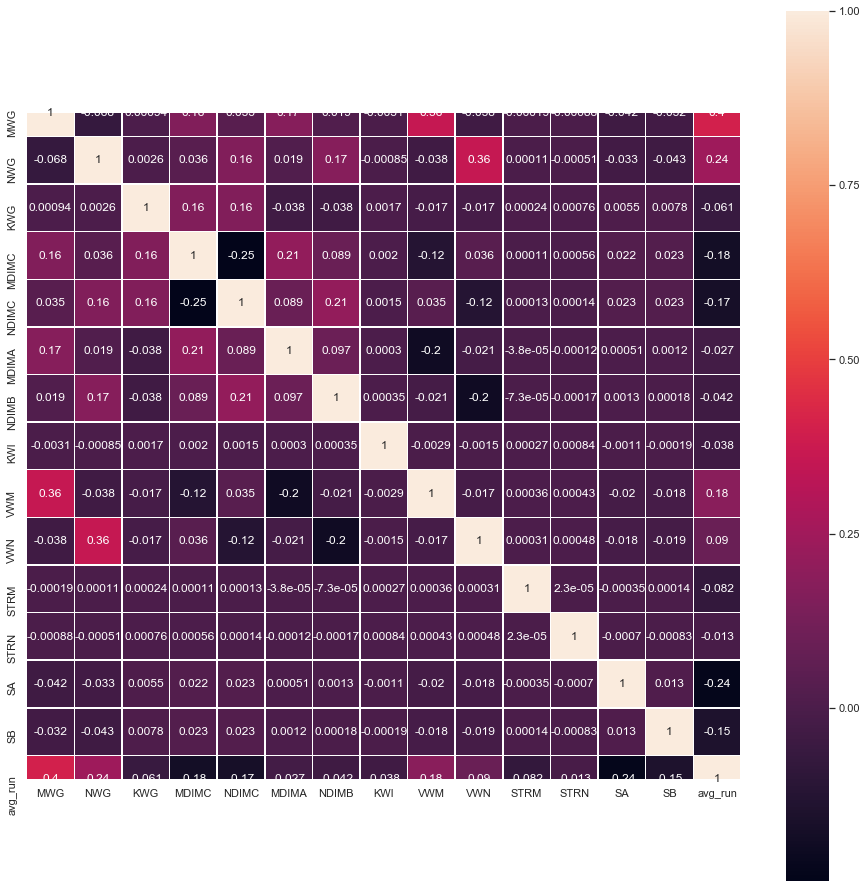

In [375]:
plt.figure(figsize=(16,16))
sns.set(font_scale=1)
sns.heatmap(df.corr(),annot=True, square = True ,linewidths=.5);

In [376]:
X = pd.DataFrame(df[['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM','VWN', 'STRM', 'STRN', 'SA', 'SB']])
y = pd.DataFrame(df[['avg_run']])

In [377]:
from sklearn.preprocessing import StandardScaler

In [378]:
scaler = StandardScaler()

In [379]:
X1 = scaler.fit_transform(X[['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB','KWI', 'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB']])

In [380]:
X1 = pd.DataFrame(X1,columns=['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB','KWI', 'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB'])

In [381]:
# adding intercept column in data frame to get intecept values
X1.insert(0,'Intercept',1)

In [382]:
X1.head()

,Intercept,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,1,-1.445035,-1.444258,-1.201041,-0.789571,-0.790131,-1.001059,-1.00099,-0.997325,-0.72737,-0.727062,-0.999841,-0.999271,-0.961486,-0.960578
1,1,-1.445035,-1.444258,-1.201041,-0.789571,-0.790131,-1.001059,-1.00099,-0.997325,-0.72737,-0.727062,-0.999841,-0.999271,-0.961486,1.041040
2,1,-1.445035,-1.444258,-1.201041,-0.789571,-0.790131,-1.001059,-1.00099,-0.997325,-0.72737,-0.727062,-0.999841,-0.999271,1.040057,-0.960578
3,1,-1.445035,-1.444258,-1.201041,-0.789571,-0.790131,-1.001059,-1.00099,-0.997325,-0.72737,-0.727062,-0.999841,-0.999271,1.040057,1.041040
4,1,-1.445035,-1.444258,-1.201041,-0.789571,-0.790131,-1.001059,-1.00099,-0.997325,-0.72737,-0.727062,-0.999841,1.000730,-0.961486,-0.960578


In [383]:
from sklearn.model_selection import train_test_split

In [444]:
# Splitting data into train and test set in 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

In [447]:
X_train = X_train.as_matrix()
X_test = X_test.as_matrix()
y_train = y_train.as_matrix()
y_test = y_test.as_matrix()

C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


### Linear Regression

In [386]:
def compute_cost(X, y, beta):
    n_samples = len(y)
    cost = np.sum((np.dot(X,beta.T)-y)**2)
    y=(1/(2*n_samples))*cost
    return y

In [387]:
def gradient_descent(X, y, alpha, n_iters):
    beta = np.zeros((1, len(X[0])))
    n_samples = len(y)
    J_history = [0] * n_iters
    for i in range(n_iters):
        loss = X.dot(beta.T) - y
        gradient = X.T.dot(loss) / n_samples
        beta = beta - (alpha * gradient.T)
        cost = compute_cost(X, y, beta)
        J_history[i] = cost
        if (abs(J_history[i]-J_history[i-1]))<=0.000001:  ##Change threshold here
            break
    print('Initial cost is:',J_history[0])
    print('Iterations needed to converge:',i+1)
    print('Cost at converge is:',J_history[i-1])
    
    J_history = np.trim_zeros(J_history)
    print('Co-efficients are:', beta)
    plt.plot(J_history)
    plt.xlabel("No. of Iterations")
    plt.ylabel("Cost")
    plt.show()
    return beta

In [388]:
def predict(X_test,beta):
    predictions = X_test.dot(beta.T)
    return predictions

In [389]:
def lm_rmse(predictions,y_test):
    mse = (sum((y_test - predictions)**2)) / len(predictions)
    rmse = (mse)**(0.5)
    return rmse

Initial cost is: 10.075900682116675
Iterations needed to converge: 10000
Cost at converge is: 1.5657705584616786
Co-efficients are: [[ 2.78076109  0.22661121  0.15166571 -0.02007448 -0.12469272 -0.11680371
  -0.0138206  -0.01902469 -0.02015557  0.06607085  0.02288824 -0.04612523
  -0.00339501 -0.12627548 -0.07787321]]


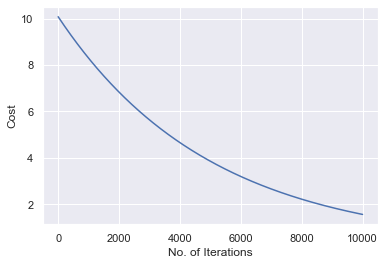

For alpha: 0.0001 Iterations: 10000
Predicted y: [[2.43678023 2.46237333 2.40873672 ... 2.79899497 2.5189975  3.33831405]] RMSE: [1.77289781]


Initial cost is: 10.058184573322942
Iterations needed to converge: 5386
Cost at converge is: 0.21552762466782938
Co-efficients are: [[ 4.37847950e+00  4.17962779e-01  2.99202606e-01  2.74276125e-02
  -2.90894328e-01 -2.73210504e-01 -1.45445679e-02 -1.93951375e-02
  -3.30956121e-02 -2.14409120e-04 -3.63432775e-02 -7.23312551e-02
  -1.19338593e-02 -1.71908681e-01 -9.42025058e-02]]


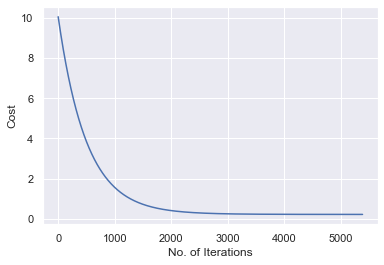

For alpha: 0.001 Iterations: 10000
Predicted y: [[3.53314457 3.97854986 3.69990901 ... 4.22235719 4.02248996 5.37169718]] RMSE: [0.65824186]


Initial cost is: 9.97963967633663
Iterations needed to converge: 1354
Cost at converge is: 0.21486234747242808
Co-efficients are: [[ 4.39358308  0.4287771   0.30831706  0.0335127  -0.303156   -0.28495887
  -0.01454893 -0.0186125  -0.03323964 -0.0085112  -0.04289962 -0.07254298
  -0.01210331 -0.17064654 -0.09263001]]


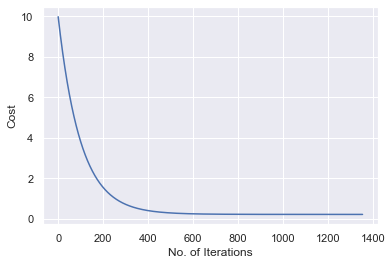

For alpha: 0.005 Iterations: 10000
Predicted y: [[3.50991596 3.99829547 3.69661786 ... 4.22098393 4.03643515 5.40802559]] RMSE: [0.65716178]


Initial cost is: 9.881902503795693
Iterations needed to converge: 747
Cost at converge is: 0.21476148994355554
Co-efficients are: [[ 4.39612402  0.4321482   0.31118371  0.03548297 -0.30704572 -0.28870453
  -0.01454514 -0.01833562 -0.03326283 -0.01112489 -0.04497975 -0.07257188
  -0.01212526 -0.17017442 -0.09210443]]


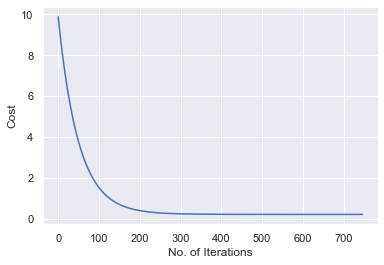

For alpha: 0.01 Iterations: 10000
Predicted y: [[3.50030744 4.00242078 3.69330383 ... 4.21837197 4.03867151 5.41707382]] RMSE: [0.65700077]


Initial cost is: 9.117763071146467
Iterations needed to converge: 184
Cost at converge is: 0.21467484355894667
Co-efficients are: [[ 4.39817634  0.43714654  0.31546617  0.0384762  -0.31289029 -0.29435529
  -0.01451902 -0.01788517 -0.03327864 -0.01500421 -0.0480918  -0.0725851
  -0.0121269  -0.16941518 -0.09130139]]


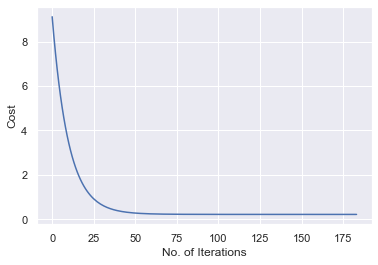

For alpha: 0.05 Iterations: 10000
Predicted y: [[3.484132   4.00690976 3.68651868 ... 4.21278886 4.04035067 5.42867405]] RMSE: [0.65686901]


Initial cost is: 8.656207406283576
Iterations needed to converge: 128
Cost at converge is: 0.21466780050436446
Co-efficients are: [[ 4.39832099  0.43788519  0.3161034   0.03892722 -0.3137643  -0.29520316
  -0.01451122 -0.0178134  -0.03327916 -0.01557659 -0.04855468 -0.0725843
  -0.01212381 -0.16929751 -0.09118062]]


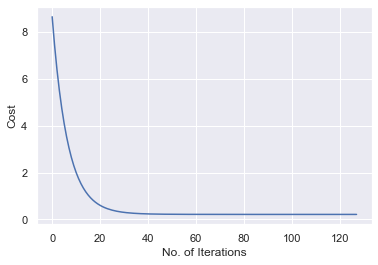

For alpha: 0.075 Iterations: 10000
Predicted y: [[3.48155505 4.00742119 3.6853363  ... 4.21180596 4.04045218 5.43021882]] RMSE: [0.65685934]


Initial cost is: 8.206983649530585
Iterations needed to converge: 99
Cost at converge is: 0.21466393245006737
Co-efficients are: [[ 4.39839395  0.43836971  0.31652226  0.03922468 -0.31433966 -0.29576183
  -0.01450515 -0.01776531 -0.03327924 -0.01595171 -0.04885883 -0.07258339
  -0.01212125 -0.16921955 -0.09110109]]


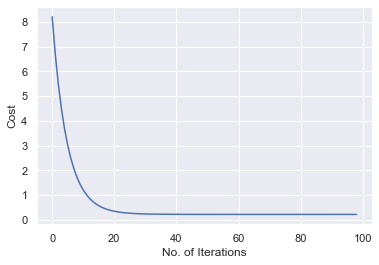

For alpha: 0.1 Iterations: 10000
Predicted y: [[3.47983725 4.00773544 3.68453465 ... 4.21113939 4.04049947 5.43120836]] RMSE: [0.65685433]


Initial cost is: 5.77061117932056
Iterations needed to converge: 43
Cost at converge is: 0.21465699927836462
Co-efficients are: [[ 4.39850227  0.43955879  0.3175536   0.03996085 -0.31575972 -0.29714268
  -0.01448633 -0.01764343 -0.03327855 -0.01687089 -0.04960721 -0.0725799
  -0.01211312 -0.16902566 -0.09090495]]


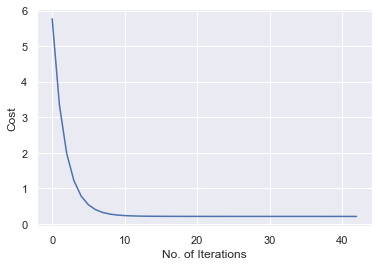

For alpha: 0.25 Iterations: 10000
Predicted y: [[3.47552915 4.00843781 3.68248048 ... 4.20943286 4.04055539 5.43355969]] RMSE: [0.65684648]


Initial cost is: 2.696543044429297
Iterations needed to converge: 22
Cost at converge is: 0.21465499069534702
Co-efficients are: [[ 4.39851849  0.44013987  0.31805938  0.04032382 -0.31645791 -0.29782273
  -0.01447507 -0.01758165 -0.03327773 -0.01731923 -0.04997389 -0.07257754
  -0.01210804 -0.16892966 -0.09080868]]


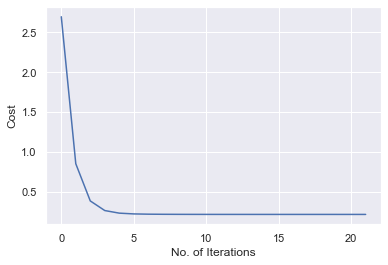

For alpha: 0.5 Iterations: 10000
Predicted y: [[3.47337615 4.00874499 3.68143126 ... 4.20856255 4.0405517  5.43466839]] RMSE: [0.65684496]


Initial cost is: 0.8556657205281685
Iterations needed to converge: 15
Cost at converge is: 0.21465380457148328
Co-efficients are: [[ 4.39851853  0.44055482  0.31842374  0.04058866 -0.3169645  -0.29831752
  -0.01446212 -0.01753431 -0.03327697 -0.01763776 -0.05023753 -0.07257565
  -0.01210388 -0.1688601  -0.09073921]]


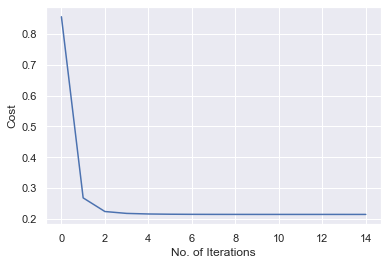

For alpha: 0.75 Iterations: 10000
Predicted y: [[3.47180449 4.0089519  3.68065597 ... 4.20792746 4.04054949 5.4354448 ]] RMSE: [0.6568448]


Initial cost is: 0.24797920761717765
Iterations needed to converge: 11
Cost at converge is: 0.214653484122593
Co-efficients are: [[ 4.39851811  0.44073706  0.31857381  0.04070185 -0.31718813 -0.29853276
  -0.01446082 -0.01751696 -0.03327671 -0.01776686 -0.0503553  -0.07257492
  -0.01210198 -0.16883043 -0.09070941]]


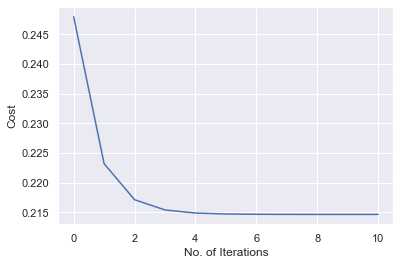

For alpha: 1 Iterations: 10000
Predicted y: [[3.47112968 4.00903039 3.68032546 ... 4.20764237 4.04054625 5.43576686]] RMSE: [0.65684497]




In [391]:
# Trying various combinations of alpha and running whole linear regression
alpha = [0.0001,0.001,0.005,0.01,0.05,0.075,0.1,0.25,0.5,0.75,1]
n_iters = 10000
beta_ls = [0] * len(alpha)
ypred_ls = [0] * len(alpha)
rmse_ls = [0] * len(alpha)
for i,a in enumerate(alpha,start=0):
    beta_ls[i] = gradient_descent(X_train, y_train, a, n_iters)
    ypred_ls[i] = predict(X_test,beta_ls[i])
    rmse_ls[i] = lm_rmse(ypred_ls[i],y_test)
    print('For alpha:',a,'Iterations:',n_iters)
    print('Predicted y:',ypred_ls[i].T,'RMSE:',rmse_ls[i])
    print('\n')

### Logistic Regression

In [392]:
mean = y.mean()

In [393]:
mean

avg_run    4.399819
dtype: float64

In [394]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220631 entries, 0 to 241599
Data columns (total 1 columns):
avg_run    220631 non-null float64
dtypes: float64(1)
memory usage: 3.4 MB


In [395]:
y1.loc[y['avg_run'] <= 4.399819,'avg_run'] = 0

In [396]:
y1.loc[y['avg_run'] > 4.399819,'avg_run'] = 1

In [397]:
y1.head()

,avg_run
0,1.0
1,0.0
2,0.0
3,1.0
4,1.0


In [398]:
# Splitting data into train-test set in 70-30 ratio
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [399]:
X_train2 = X_train2.as_matrix()
X_test2 = X_test2.as_matrix()
y_train2 = y_train2.as_matrix()
y_test2 = y_test2.as_matrix()

C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [400]:
def sigmoid(Xtrain2,beta):
    z = np.dot(Xtrain2,beta.T)
    z = 1 / (1 + np.exp(-z))
    return z

In [401]:
def logistic_compute_cost(sigmoid_y,y_train2):
    n_sample = len(y_train2)
    c1 = np.sum((y_train2.T).dot(np.log(sigmoid_y)))
    c2 = np.sum((1-y_train2.T).dot(np.log(1-sigmoid_y)))
    cost = -(c1+c2) / n_sample
    return cost

In [406]:
def logistic_gradient_descent(X_train2,y_train2,alpha,n_iters):
    beta = np.zeros((1,len(X_train2[0])));
    J_history = [0] * n_iters
    n_sample = len(X_train2)
    for i in range(n_iters):
        sigmoid_y = sigmoid(X_train2,beta)
        loss = sigmoid_y - y_train2
        gradient = X_train2.T.dot(loss) / n_sample
        beta = beta - (alpha * gradient.T)
        cost = logistic_compute_cost(sigmoid_y,y_train2)
        J_history[i] = cost
        if (abs(J_history[i]-J_history[i-1]))<=0.000001:  ## Change threshold here
            break
    print('Initial cost is:',J_history[0])
    print('Iterations needed to converge:',i)
    print('Cost at converge is:',J_history[i-1])
    
    J_history = np.trim_zeros(J_history)
    print('Co-efficients are:', beta)
    plt.plot(J_history)
    plt.xlabel("No. of Iterations")
    plt.ylabel("Cost")
    plt.show()
    return beta

In [403]:
def logistic_predict(X_test2,beta):
    predictions = X_test2.dot(beta.T)
    predictions = np.where(predictions >= 0.5 , 1, 0)
    return predictions

In [404]:
def accuracy(y_test2,y_pred2):
    df = pd.DataFrame({'Actual': y_test2.flatten(), 'Predicted': y_pred2.flatten()})
    csr= df.loc[df['Actual'] == df['Predicted']]
    total = len(y_test2)
    accurate = len(csr)
    return accurate / total

Initial cost is: 0.6931471805599372
Iterations needed to converge: 9999
Cost at converge is: 0.6259598538092809
Co-efficients are: [[-0.09604423  0.16514202  0.10706223 -0.02247195 -0.06943702 -0.05773212
  -0.00304498 -0.01072262 -0.00214613  0.06321483  0.03684343 -0.02916735
  -0.00502293 -0.05346234 -0.03087786]]


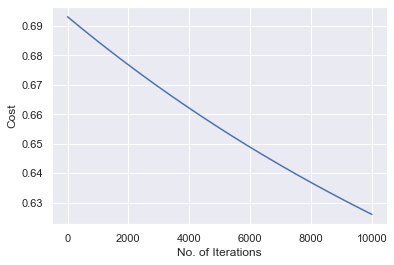

For alpha: 0.0001 Iterations: 10000
Predicted y: [[0 0 0 ... 0 0 0]] Accuracy: 0.6165583925064209


Initial cost is: 0.6931471805599372
Iterations needed to converge: 9999
Cost at converge is: 0.4866106804254301
Co-efficients are: [[-0.45411554  0.81211238  0.57650545 -0.03418945 -0.45916752 -0.39847257
  -0.01471433 -0.04141059 -0.00901587  0.11162092  0.05412539 -0.13892409
  -0.02287248 -0.211304   -0.10249941]]


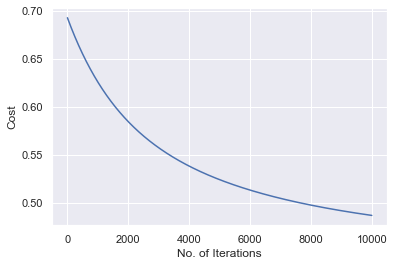

For alpha: 0.001 Iterations: 10000
Predicted y: [[0 0 0 ... 0 0 1]] Accuracy: 0.7831092310016619


Initial cost is: 0.6931471805599372
Iterations needed to converge: 7819
Cost at converge is: 0.45173555100767027
Co-efficients are: [[-0.6614765   1.29567349  0.98186114  0.06101324 -0.89369821 -0.7999322
  -0.0330805  -0.05376675 -0.01179304 -0.02967512 -0.06470529 -0.19967676
  -0.03081187 -0.26161109 -0.10408612]]


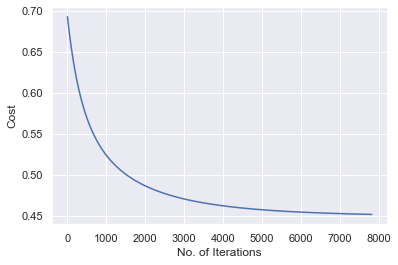

For alpha: 0.005 Iterations: 10000
Predicted y: [[0 0 0 ... 0 0 1]] Accuracy: 0.83808732436924


Initial cost is: 0.6931471805599372
Iterations needed to converge: 4747
Cost at converge is: 0.4505312297110715
Co-efficients are: [[-0.68268428  1.34666441  1.02530202  0.07307175 -0.94250971 -0.84564369
  -0.03477098 -0.05465659 -0.01206485 -0.04431342 -0.07794125 -0.20539048
  -0.03149774 -0.26619643 -0.10401298]]


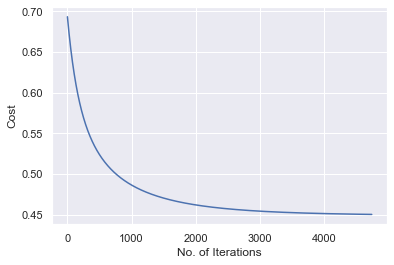

For alpha: 0.01 Iterations: 10000
Predicted y: [[0 0 0 ... 0 0 1]] Accuracy: 0.8422722465629249


Initial cost is: 0.6931471805599372
Iterations needed to converge: 1369
Cost at converge is: 0.44949861010225917
Co-efficients are: [[-0.71410865  1.42001842  1.08767964  0.09008099 -1.01278437 -0.91145084
  -0.03690123 -0.05583404 -0.01247884 -0.06415023 -0.09608375 -0.21379657
  -0.0325189  -0.27332184 -0.10427837]]


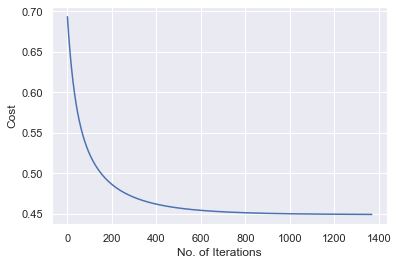

For alpha: 0.05 Iterations: 10000
Predicted y: [[0 0 0 ... 0 0 1]] Accuracy: 0.8466988971143677


Initial cost is: 0.6931471805599372
Iterations needed to converge: 986
Cost at converge is: 0.4494078355166247
Co-efficients are: [[-0.71913268  1.43149463  1.09741998  0.09269213 -1.02377048 -0.92173172
  -0.03720667 -0.05600972 -0.01254612 -0.06712775 -0.09881937 -0.21513772
  -0.03268343 -0.27449834 -0.1043603 ]]


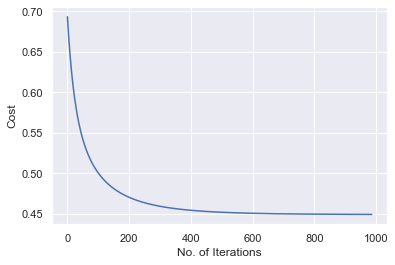

For alpha: 0.075 Iterations: 10000
Predicted y: [[0 0 0 ... 0 0 1]] Accuracy: 0.8472427859193231


Initial cost is: 0.6931471805599372
Iterations needed to converge: 779
Cost at converge is: 0.44936177972347274
Co-efficients are: [[-0.72219247  1.43845159  1.10332155  0.09426751 -1.03042793 -0.92796034
  -0.03738905 -0.0561154  -0.01258722 -0.06891731 -0.1004641  -0.21595439
  -0.03278384 -0.27521967 -0.10441512]]


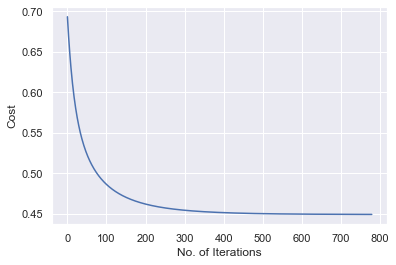

For alpha: 0.1 Iterations: 10000
Predicted y: [[0 0 0 ... 0 0 1]] Accuracy: 0.8473334340534824


Initial cost is: 0.6931471805599372
Iterations needed to converge: 362
Cost at converge is: 0.44927815638018814
Co-efficients are: [[-0.72961574  1.45523172  1.11754549  0.0980431  -1.04647625 -0.94296967
  -0.03782205 -0.05636835 -0.01268729 -0.07318807 -0.10438925 -0.21793551
  -0.03302809 -0.27698428 -0.10456297]]


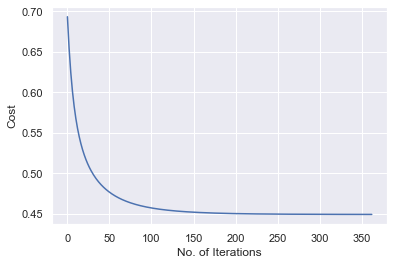

For alpha: 0.25 Iterations: 10000
Predicted y: [[0 0 0 ... 0 0 1]] Accuracy: 0.8484363196857532


Initial cost is: 0.6931471805599372
Iterations needed to converge: 200
Cost at converge is: 0.44924969971473033
Co-efficients are: [[-0.73351241  1.46398706  1.12496057  0.09999899 -1.05484335 -0.95079172
  -0.03804522 -0.05649956 -0.01274    -0.07539215 -0.10641402 -0.21897543
  -0.03315667 -0.27791858 -0.10464864]]


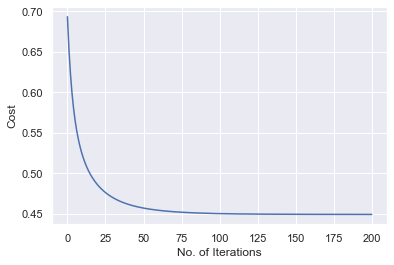

For alpha: 0.5 Iterations: 10000
Predicted y: [[0 0 0 ... 0 0 1]] Accuracy: 0.8487838042000302


Initial cost is: 0.6931471805599372
Iterations needed to converge: 141
Cost at converge is: 0.4492397109438452
Co-efficients are: [[-0.73537198  1.46815306  1.12848711  0.10092614 -1.05882278 -0.95451103
  -0.03815104 -0.05656189 -0.01276519 -0.0764354  -0.10737191 -0.2194717
  -0.03321812 -0.27836633 -0.10469141]]


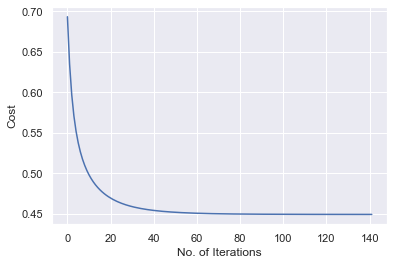

For alpha: 0.75 Iterations: 10000
Predicted y: [[0 0 0 ... 0 0 1]] Accuracy: 0.848934884423629


Initial cost is: 0.6931471805599372
Iterations needed to converge: 109
Cost at converge is: 0.4492354978710127
Co-efficients are: [[-0.73634106  1.47032111  1.13032191  0.10140772 -1.06089321 -0.95644587
  -0.03820609 -0.05659433 -0.01277833 -0.076977   -0.10786903 -0.21973033
  -0.03325017 -0.27860014 -0.10471417]]


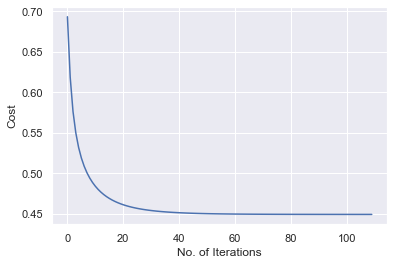

For alpha: 1 Iterations: 10000
Predicted y: [[0 0 0 ... 0 0 1]] Accuracy: 0.8489651004683487




In [407]:
alpha = [0.0001,0.001,0.005,0.01,0.05,0.075,0.1,0.25,0.5,0.75,1]
n_iters = 10000
beta_ls = [0] * len(alpha)
ypred_ls = [0] * len(alpha)
accuracy_ls = [0] * len(alpha)
for i,a in enumerate(alpha,start=0):
    beta_ls[i] = logistic_gradient_descent(X_train2, y_train2, a, n_iters)
    ypred_ls[i] = logistic_predict(X_test2,beta_ls[i])
    accuracy_ls[i] = accuracy(y_test2,ypred_ls[i])
    print('For alpha:',a,'Iterations:',n_iters)
    print('Predicted y:',ypred_ls[i].T,'Accuracy:',accuracy_ls[i])
    print('\n')

### Experiment 1

In [408]:
#Experiment 1a
# plotting the graph for alpha vs rmse, values obtained from linear function mentioned below and note it down
alpha_linear = [0.92,0.93,0.94,0.95,0.96,0.97,0.98]
error_linear = [0.65684489,0.65684485,0.65684481,0.65684477,0.65684481,0.65684484,0.65684488]

Initial cost is: 0.27310054323573474
Iterations needed to converge: 11
Cost at converge is: 0.2146543218347003
Co-efficients are: [[ 4.39851863  0.44051811  0.31838706  0.04055965 -0.31691243 -0.29826519
  -0.01446872 -0.01754143 -0.03327703 -0.01760973 -0.05021261 -0.07257582
  -0.0121043  -0.16886712 -0.0907462 ]]


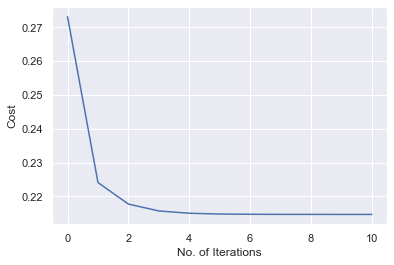

For alpha: 0.9477 Iterations: 20000
Predicted y: [[3.47196758 4.00893276 3.68073906 ... 4.20798572 4.04053836 5.43537632]] RMSE: [0.65684477]




In [409]:
# Change the value of alpha below to get RMSE
alpha = [0.9477]
n_iters = 20000
beta_ls = [0] * len(alpha)
ypred_ls = [0] * len(alpha)
rmse_ls = [0] * len(alpha)
for i,a in enumerate(alpha,start=0):
    beta_ls[i] = gradient_descent(X_train, y_train, a, n_iters)
    ypred_ls[i] = predict(X_test,beta_ls[i])
    rmse_ls[i] = lm_rmse(ypred_ls[i],y_test)
    print('For alpha:',a,'Iterations:',n_iters)
    print('Predicted y:',ypred_ls[i].T,'RMSE:',rmse_ls[i])
    print('\n')

Text(0, 0.5, 'Error (RMSE)')

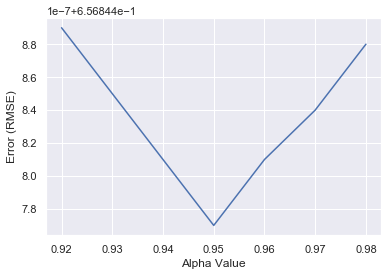

In [410]:
# Plot of error vs Alpha Value to get global minima for Linear Regression(optimum = 0.95)
plt.plot(alpha_linear,error_linear)
plt.xlabel('Alpha Value')
plt.ylabel('Error (RMSE)')

Initial cost is: 0.27310054323573474
Iterations needed to converge: 11
Cost at converge is: 0.2146543218347003
Co-efficients are: [[ 4.39851863  0.44051811  0.31838706  0.04055965 -0.31691243 -0.29826519
  -0.01446872 -0.01754143 -0.03327703 -0.01760973 -0.05021261 -0.07257582
  -0.0121043  -0.16886712 -0.0907462 ]]


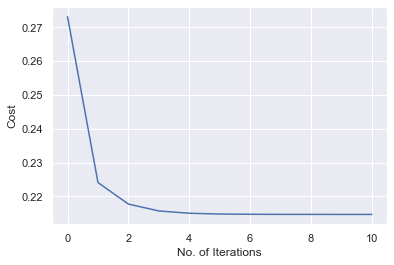

For alpha: 0.9477 Iterations: 20000
Predicted y: [[3.47196758 4.00893276 3.68073906 ... 4.20798572 4.04053836 5.43537632]] RMSE: [0.65684477]




In [411]:
# Change the value of alpha below to get RMSE
alpha = [0.9477]  ##Here
n_iters = 20000
beta_ls = [0] * len(alpha)
ypred_ls = [0] * len(alpha)
rmse_ls = [0] * len(alpha)
for i,a in enumerate(alpha,start=0):
    beta_ls[i] = gradient_descent(X_train, y_train, a, n_iters)
    ypred_ls[i] = predict(X_test,beta_ls[i])
    rmse_ls[i] = lm_rmse(ypred_ls[i],y_test)
    print('For alpha:',a,'Iterations:',n_iters)
    print('Predicted y:',ypred_ls[i].T,'RMSE:',rmse_ls[i])
    print('\n')

In [412]:
#Experiment 1b
# plotting the graph for alpha vs accuracy, values obtained from logistic function mentioned below and note it down
alpha_logistic = [7.8,7.86,7.87,7.88,7.89,7.9,7.91,7.92,7.93,7.94,8]
accuracy_logistic = [0.85068,0.85085,0.85328,0.85332,0.85399,0.85393,0.85359,0.85328,0.85345,0.85298,0.85270]

Initial cost is: 0.6931471805599372
Iterations needed to converge: 49
Cost at converge is: 0.45048900949836224
Co-efficients are: [[-0.74578686  1.43381331  1.19563324  0.10204212 -1.07974442 -0.97956149
  -0.04245829 -0.05868553 -0.01283528 -0.12498873 -0.06629324 -0.22435611
  -0.03442622 -0.28412125 -0.10718874]]


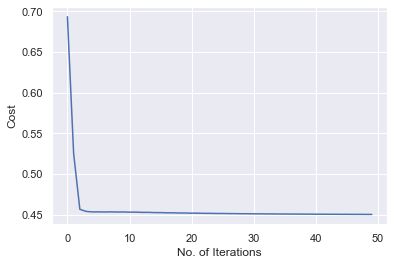

For alpha: 7.89 Iterations: 10000
Predicted y: [[0 0 0 ... 0 0 1]] Accuracy: 0.8539960719141865




In [413]:
# Change the value of alpha below to get accuracy
alpha = [7.89]    ## Here
n_iters = 10000
beta_ls = [0] * len(alpha)
ypred_ls = [0] * len(alpha)
accuracy_ls = [0] * len(alpha)
for i,a in enumerate(alpha,start=0):
    beta_ls[i] = logistic_gradient_descent(X_train2, y_train2, a, n_iters)
    ypred_ls[i] = logistic_predict(X_test2,beta_ls[i])
    accuracy_ls[i] = accuracy(y_test2,ypred_ls[i])
    print('For alpha:',a,'Iterations:',n_iters)
    print('Predicted y:',ypred_ls[i].T,'Accuracy:',accuracy_ls[i])
    print('\n')

Text(0, 0.5, 'Accuracy')

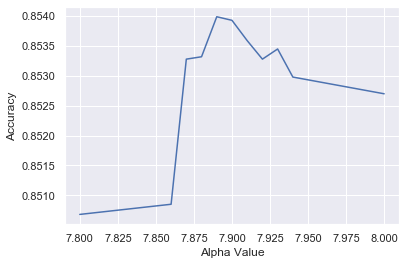

In [414]:
# Plot of Accuracy vs Alpha Value to get global minima for Linear Regression
plt.plot(alpha_logistic,accuracy_logistic)
plt.xlabel('Alpha Value')
plt.ylabel('Accuracy')

### Experiment 2

Initial cost is: 0.27086124532016514
Iterations needed to converge: 11
Cost at converge is: 0.21465426994232636
Co-efficients are: [[ 4.39851861  0.44052961  0.31839718  0.04056721 -0.31692687 -0.2982793
  -0.01446818 -0.01754004 -0.03327701 -0.01761834 -0.05022004 -0.07257577
  -0.01210418 -0.16886516 -0.09074424]]


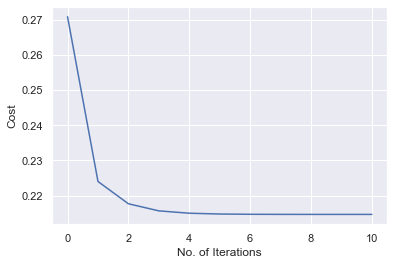

For alpha: 0.95 Iterations: 20000
Predicted y: [[3.47192309 4.00893827 3.68071703 ... 4.20796786 4.04053881 5.43539743]] RMSE: [0.65684478]




In [415]:
## Changing threshold in function for optimum alpha value(0.95)
# Change the value of threshold in above code
alpha = [0.95]
n_iters = 20000
beta_ls = [0] * len(alpha)
ypred_ls = [0] * len(alpha)
rmse_ls = [0] * len(alpha)
for i,a in enumerate(alpha,start=0):
    beta_ls[i] = gradient_descent(X_train, y_train, a, n_iters)
    ypred_ls[i] = predict(X_test,beta_ls[i])
    rmse_ls[i] = lm_rmse(ypred_ls[i],y_test)
    print('For alpha:',a,'Iterations:',n_iters)
    print('Predicted y:',ypred_ls[i].T,'RMSE:',rmse_ls[i])
    print('\n')

In [416]:
# Note down error for threshold
threshold_linear = [0.000001,0.00001,0.0001,0.001]
rmse_t_linear = [0.65684477,0.65684720,0.65688896,0.65731817]

Text(0.5, 1.0, 'RMSE Vs Threshold')

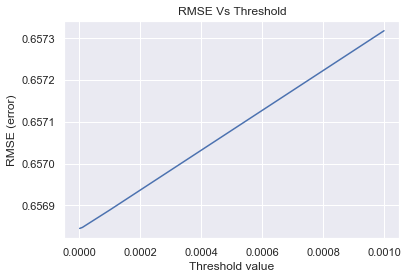

In [417]:
plt.plot(threshold_linear,rmse_t_linear)
plt.xlabel('Threshold value')
plt.ylabel('RMSE (error)')
plt.title('RMSE Vs Threshold')

In [418]:
# Note down accuracy for threshold
threshold_logistic = [0.0001,0.001,0.01,0.1]
accuracy_logistic = [0.85044,0.82646,0.84586,0.82702]

Initial cost is: 0.6931471805599372
Iterations needed to converge: 49
Cost at converge is: 0.45048900949836224
Co-efficients are: [[-0.74578686  1.43381331  1.19563324  0.10204212 -1.07974442 -0.97956149
  -0.04245829 -0.05868553 -0.01283528 -0.12498873 -0.06629324 -0.22435611
  -0.03442622 -0.28412125 -0.10718874]]


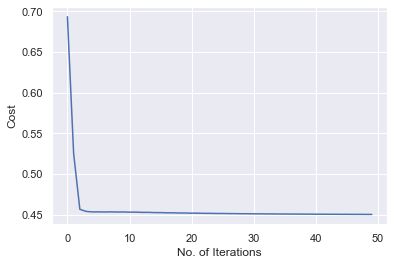

For alpha: 7.89 Iterations: 10000
Predicted y: [[0 0 0 ... 0 0 1]] Accuracy: 0.8539960719141865




In [419]:
alpha = [7.89]
n_iters = 10000
beta_ls = [0] * len(alpha)
ypred_ls = [0] * len(alpha)
accuracy_ls = [0] * len(alpha)
for i,a in enumerate(alpha,start=0):
    beta_ls[i] = logistic_gradient_descent(X_train2, y_train2, a, n_iters)
    ypred_ls[i] = logistic_predict(X_test2,beta_ls[i])
    accuracy_ls[i] = accuracy(y_test2,ypred_ls[i])
    print('For alpha:',a,'Iterations:',n_iters)
    print('Predicted y:',ypred_ls[i].T,'Accuracy:',accuracy_ls[i])
    print('\n')

Text(0.5, 1.0, 'Accuracy Vs Threshold')

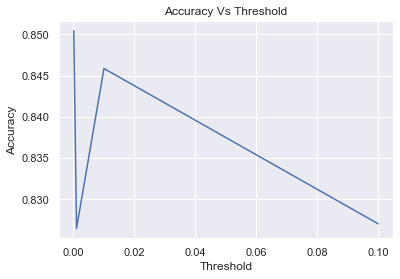

In [420]:
plt.plot(threshold_logistic,accuracy_logistic)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Vs Threshold')

### Experiment 3

#### Picking random 8 features for linear model


In [421]:
X1.columns

Index(['Intercept', 'MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB',
       'KWI', 'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB'],
      dtype='object')

In [422]:
X_lin1 = X1[['Intercept', 'MWG', 'KWG', 'MDIMC', 'MDIMA','KWI', 'VWN', 'STRM', 'SB']]

In [423]:
# Splitting data into train and test set in 70/30 ratio
X_train_r1, X_test_r1, y_train_r1, y_test_r1 = train_test_split(X_lin1, y, test_size=0.3, random_state=42)

In [424]:
X_train_r1 = X_train_r1.as_matrix()
X_test_r1 = X_test_r1.as_matrix()
y_train_r1 = y_train_r1.as_matrix()
y_test_r1 = y_test_r1.as_matrix()

C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


Initial cost is: 0.3228446142928059
Iterations needed to converge: 6
Cost at converge is: 0.2943696751497448
Co-efficients are: [[ 4.39956575  0.40348442 -0.0198739  -0.21750837 -0.04700098 -0.03289409
   0.10072272 -0.07301309 -0.11359068]]


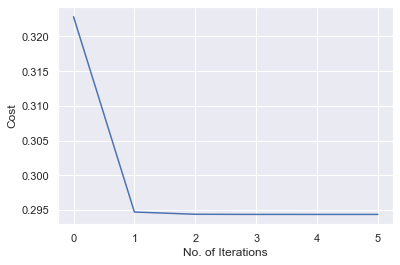

For alpha: 0.95 Iterations: 20000
Predicted y: [[3.75948535 3.84081364 4.08592596 ... 4.35179614 4.04697928 4.98854485]] RMSE: [0.76810992]




In [425]:
# inserting random selected variables
# Once you run, it can be observed that RMSE is lower than the actual model
alpha = [0.95]
n_iters = 20000
beta_ls = [0] * len(alpha)
ypred_ls = [0] * len(alpha)
rmse_ls = [0] * len(alpha)
for i,a in enumerate(alpha,start=0):
    beta_ls[i] = gradient_descent(X_train_r1, y_train_r1, a, n_iters)
    ypred_ls[i] = predict(X_test_r1,beta_ls[i])
    rmse_ls[i] = lm_rmse(ypred_ls[i],y_test_r1)
    print('For alpha:',a,'Iterations:',n_iters)
    print('Predicted y:',ypred_ls[i].T,'RMSE:',rmse_ls[i])
    print('\n')

In [426]:
## For logistic

In [427]:
X_log1 = X1[['Intercept', 'MWG', 'KWG', 'MDIMC', 'MDIMA','KWI', 'VWN', 'STRM', 'SB']]

In [428]:
X_train_g1, X_test_g1, y_train_g1, y_test_g1 = train_test_split(X_log1, y1, test_size=0.3, random_state=42)

In [429]:
X_train_g1 = X_train_g1.as_matrix()
X_test_g1 = X_test_g1.as_matrix()
y_train_g1 = y_train_g1.as_matrix()
y_test_g1 = y_test_g1.as_matrix()

C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


Initial cost is: 0.6931471805599372
Iterations needed to converge: 9999
Cost at converge is: 0.5652772134857692
Co-efficients are: [[-0.59804746  0.8321274  -0.11915697 -0.75522316 -0.25879961 -0.01079219
   0.3729777  -0.20129868 -0.15531043]]


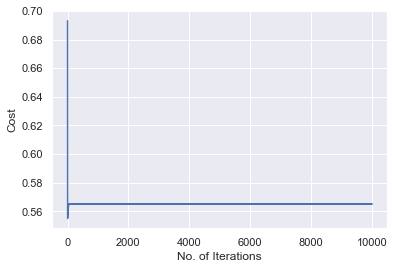

For alpha: 7.89 Iterations: 10000
Predicted y: [[0 0 0 ... 0 0 0]] Accuracy: 0.7172533615349751




In [430]:
## It can be observed that accuracy decreases for logistic model
alpha = [7.89]
n_iters = 10000
beta_ls = [0] * len(alpha)
ypred_ls = [0] * len(alpha)
accuracy_ls = [0] * len(alpha)
for i,a in enumerate(alpha,start=0):
    beta_ls[i] = logistic_gradient_descent(X_train_g1, y_train_g1, a, n_iters)
    ypred_ls[i] = logistic_predict(X_test_g1,beta_ls[i])
    accuracy_ls[i] = accuracy(y_test_g1,ypred_ls[i])
    print('For alpha:',a,'Iterations:',n_iters)
    print('Predicted y:',ypred_ls[i].T,'Accuracy:',accuracy_ls[i])
    print('\n')

In [431]:
X1.columns

Index(['Intercept', 'MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB',
       'KWI', 'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB'],
      dtype='object')

### Experiment 4

#### For Linear Model

In [432]:
X_lin2 = X1[['Intercept', 'MWG', 'NWG', 'MDIMC', 'NDIMC', 'VWM', 'STRN', 'SA', 'SB']]

In [433]:
# Splitting data into train and test set in 70/30 ratio
X_train_r2, X_test_r2, y_train_r2, y_test_r2 = train_test_split(X_lin2, y, test_size=0.3, random_state=42)

In [434]:
X_train_r2 = X_train_r2.as_matrix()
X_test_r2 = X_test_r2.as_matrix()
y_train_r2 = y_train_r2.as_matrix()
y_test_r2 = y_test_r2.as_matrix()

C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


Initial cost is: 0.2699880729696046
Iterations needed to converge: 10
Cost at converge is: 0.21982234820767946
Co-efficients are: [[ 4.39857973  0.43531042  0.2950896  -0.3119171  -0.28561354 -0.01288166
  -0.01201437 -0.16904695 -0.09111629]]


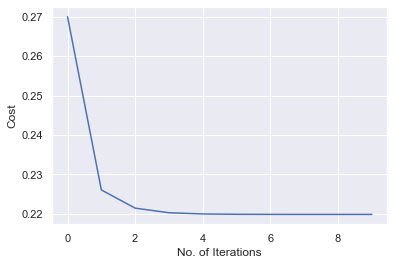

For alpha: 0.95 Iterations: 20000
Predicted y: [[3.62133057 4.04157591 3.52308587 ... 4.41246548 4.05583946 5.43088662]] RMSE: [0.66457568]




In [435]:
# inserting random selected variables (2)
# Once you run, it can be observed that RMSE is lower than the actual model and random model above
alpha = [0.95]
n_iters = 20000
beta_ls = [0] * len(alpha)
ypred_ls = [0] * len(alpha)
rmse_ls = [0] * len(alpha)
for i,a in enumerate(alpha,start=0):
    beta_ls[i] = gradient_descent(X_train_r2, y_train_r2, a, n_iters)
    ypred_ls[i] = predict(X_test_r2,beta_ls[i])
    rmse_ls[i] = lm_rmse(ypred_ls[i],y_test_r2)
    print('For alpha:',a,'Iterations:',n_iters)
    print('Predicted y:',ypred_ls[i].T,'RMSE:',rmse_ls[i])
    print('\n')

#### For Logistic Model

In [436]:
X_log2 = X1[['Intercept', 'MWG', 'NWG', 'MDIMC', 'NDIMC', 'VWM', 'STRN', 'SA', 'SB']]

In [437]:
# Splitting data into train and test set in 70/30 ratio
X_train_g2, X_test_g2, y_train_g2, y_test_g2 = train_test_split(X_log2, y1, test_size=0.3, random_state=42)

In [438]:
X_train_g2 = X_train_g2.as_matrix()
X_test_g2 = X_test_g2.as_matrix()
y_train_g2 = y_train_g2.as_matrix()
y_test_g2 = y_test_g2.as_matrix()

C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


Initial cost is: 0.6931471805599372
Iterations needed to converge: 28
Cost at converge is: 0.4546031646962511
Co-efficients are: [[-0.73051088  1.4547657   1.07223558 -1.04633877 -0.92689429 -0.06537182
  -0.03250666 -0.27626964 -0.10374325]]


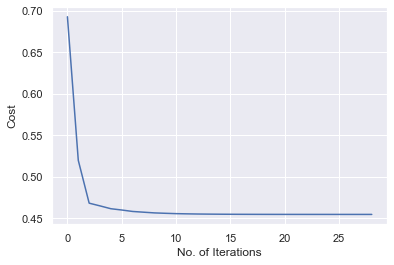

For alpha: 7.89 Iterations: 10000
Predicted y: [[0 0 0 ... 0 0 1]] Accuracy: 0.8395679105605076




In [439]:
## It can be observed that accuracy decreases for logistic model but increases from above random model
alpha = [7.89]
n_iters = 10000
beta_ls = [0] * len(alpha)
ypred_ls = [0] * len(alpha)
accuracy_ls = [0] * len(alpha)
for i,a in enumerate(alpha,start=0):
    beta_ls[i] = logistic_gradient_descent(X_train_g2, y_train_g2, a, n_iters)
    ypred_ls[i] = logistic_predict(X_test_g2,beta_ls[i])
    accuracy_ls[i] = accuracy(y_test_g2,ypred_ls[i])
    print('For alpha:',a,'Iterations:',n_iters)
    print('Predicted y:',ypred_ls[i].T,'Accuracy:',accuracy_ls[i])
    print('\n')